In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<div style="display:flex; align-items:center; gap:14px; padding:12px 16px; border-radius:10px;
            background:linear-gradient(90deg,#f8fbff,#ffffff); box-shadow:0 4px 12px rgba(20,40,80,0.04);">
  <!-- small chart SVG icon -->
  <svg width="44" height="44" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
    <rect x="3" y="11" width="3" height="8" rx="0.5" fill="#4F46E5"/>
    <rect x="9" y="7" width="3" height="12" rx="0.5" fill="#0EA5A4"/>
    <rect x="15" y="3" width="3" height="16" rx="0.5" fill="#F59E0B"/>
  </svg>

  <div>
    <h2 style="margin:0; font-size:20px; color:#0f100b;">Breast Cancer Dataset</h2>
    <p style="margin:6px 0 0; color:#475569; font-size:13px;">
    </p>
  </div>
</div>


In [118]:
df=pd.read_csv(r"C:\Users\92331\Desktop\ML\KNN\KNNAlgorithmDataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<div style="display:flex; align-items:center; gap:14px; padding:12px 16px; border-radius:10px;
            background:linear-gradient(90deg,#f8fbff,#ffffff); box-shadow:0 4px 12px rgba(20,40,80,0.04);">
  <!-- small chart SVG icon -->
  <svg width="44" height="44" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
    <rect x="3" y="11" width="3" height="8" rx="0.5" fill="#4F46E5"/>
    <rect x="9" y="7" width="3" height="12" rx="0.5" fill="#0EA5A4"/>
    <rect x="15" y="3" width="3" height="16" rx="0.5" fill="#F59E0B"/>
  </svg>

  <div>
    <h2 style="margin:0; font-size:20px; color:#0f172a;">Data Exploration</h2>
    <p style="margin:6px 0 0; color:#475569; font-size:13px;">
    </p>
  </div>
</div>


In [119]:
df.shape


(569, 33)

In [120]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [121]:
df.isna().sum()
df = df.drop(columns=['Unnamed: 32'], errors='ignore')


In [122]:
#dropped the id column as it has no use 
df=df.drop('id',axis=1)

In [123]:
for var in df.columns:
    print(df[var].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64
radius_mean
12.340    4
11.060    3
13.050    3
10.260    3
12.890    3
         ..
8.571     1
13.940    1
13.820    1
23.090    1
9.268     1
Name: count, Length: 456, dtype: int64
texture_mean
15.70    3
18.22    3
20.52    3
19.83    3
14.93    3
        ..
14.88    1
20.98    1
13.86    1
23.84    1
15.71    1
Name: count, Length: 479, dtype: int64
perimeter_mean
82.61     3
134.70    3
87.76     3
129.10    2
82.69     2
         ..
142.00    1
131.20    1
108.30    1
140.10    1
77.83     1
Name: count, Length: 522, dtype: int64
area_mean
512.2     3
658.8     2
684.5     2
1076.0    2
1075.0    2
         ..
1479.0    1
1261.0    1
858.1     1
1265.0    1
578.3     1
Name: count, Length: 539, dtype: int64
smoothness_mean
0.10070    5
0.10750    4
0.10540    4
0.11500    4
0.10490    3
          ..
0.09056    1
0.09524    1
0.07335    1
0.11370    1
0.11390    1
Name: count, Length: 474, dtype: int64
compactness_mean
0.1147  

In [124]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [125]:
df['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

<div style="display:flex; align-items:center; gap:14px; padding:12px 16px; border-radius:10px;
            background:linear-gradient(90deg,#f8fbff,#ffffff); box-shadow:0 4px 12px rgba(20,40,80,0.04);">
  <!-- small chart SVG icon -->
  <svg width="44" height="44" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
    <rect x="3" y="11" width="3" height="8" rx="0.5" fill="#4F46E5"/>
    <rect x="9" y="7" width="3" height="12" rx="0.5" fill="#0EA5A4"/>
    <rect x="15" y="3" width="3" height="16" rx="0.5" fill="#F59E0B"/>
  </svg>

  <div>
    <h2 style="margin:0; font-size:20px; color:#0f172a;">Visualization</h2>
    <p style="margin:6px 0 0; color:#475569; font-size:13px;">
      Key plots: distribution, outliers and  correlation 
    </p>
  </div>
</div>


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>],
       [<Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>]], dtype=object)

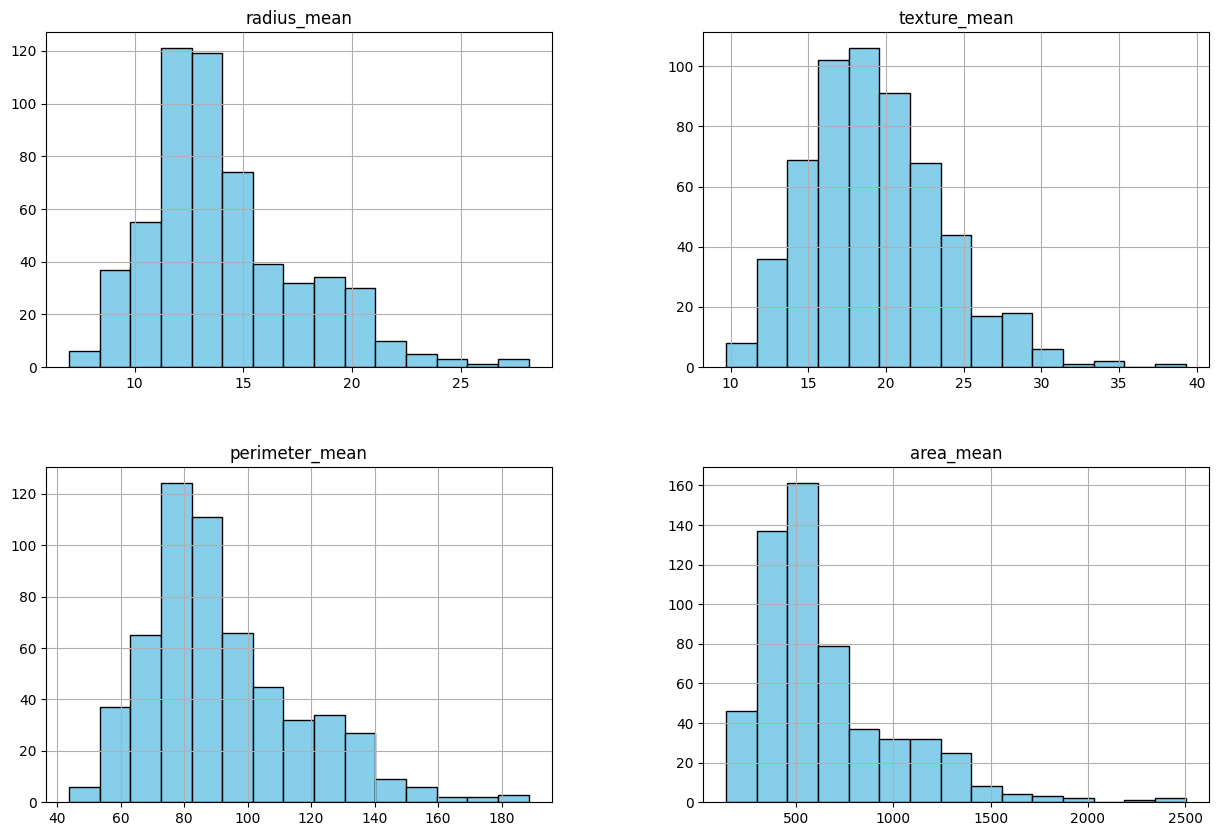

In [126]:
#choosing some columns for histogram 
important_cols = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

df[important_cols].hist(bins=15,figsize=(15,10),color='skyblue',edgecolor='black')




In [127]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
correlation = df.corr()
correlation['diagnosis'].sort_values(ascending=False)


diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

<Axes: title={'center': 'Correlation of Attributes with the target variable'}>

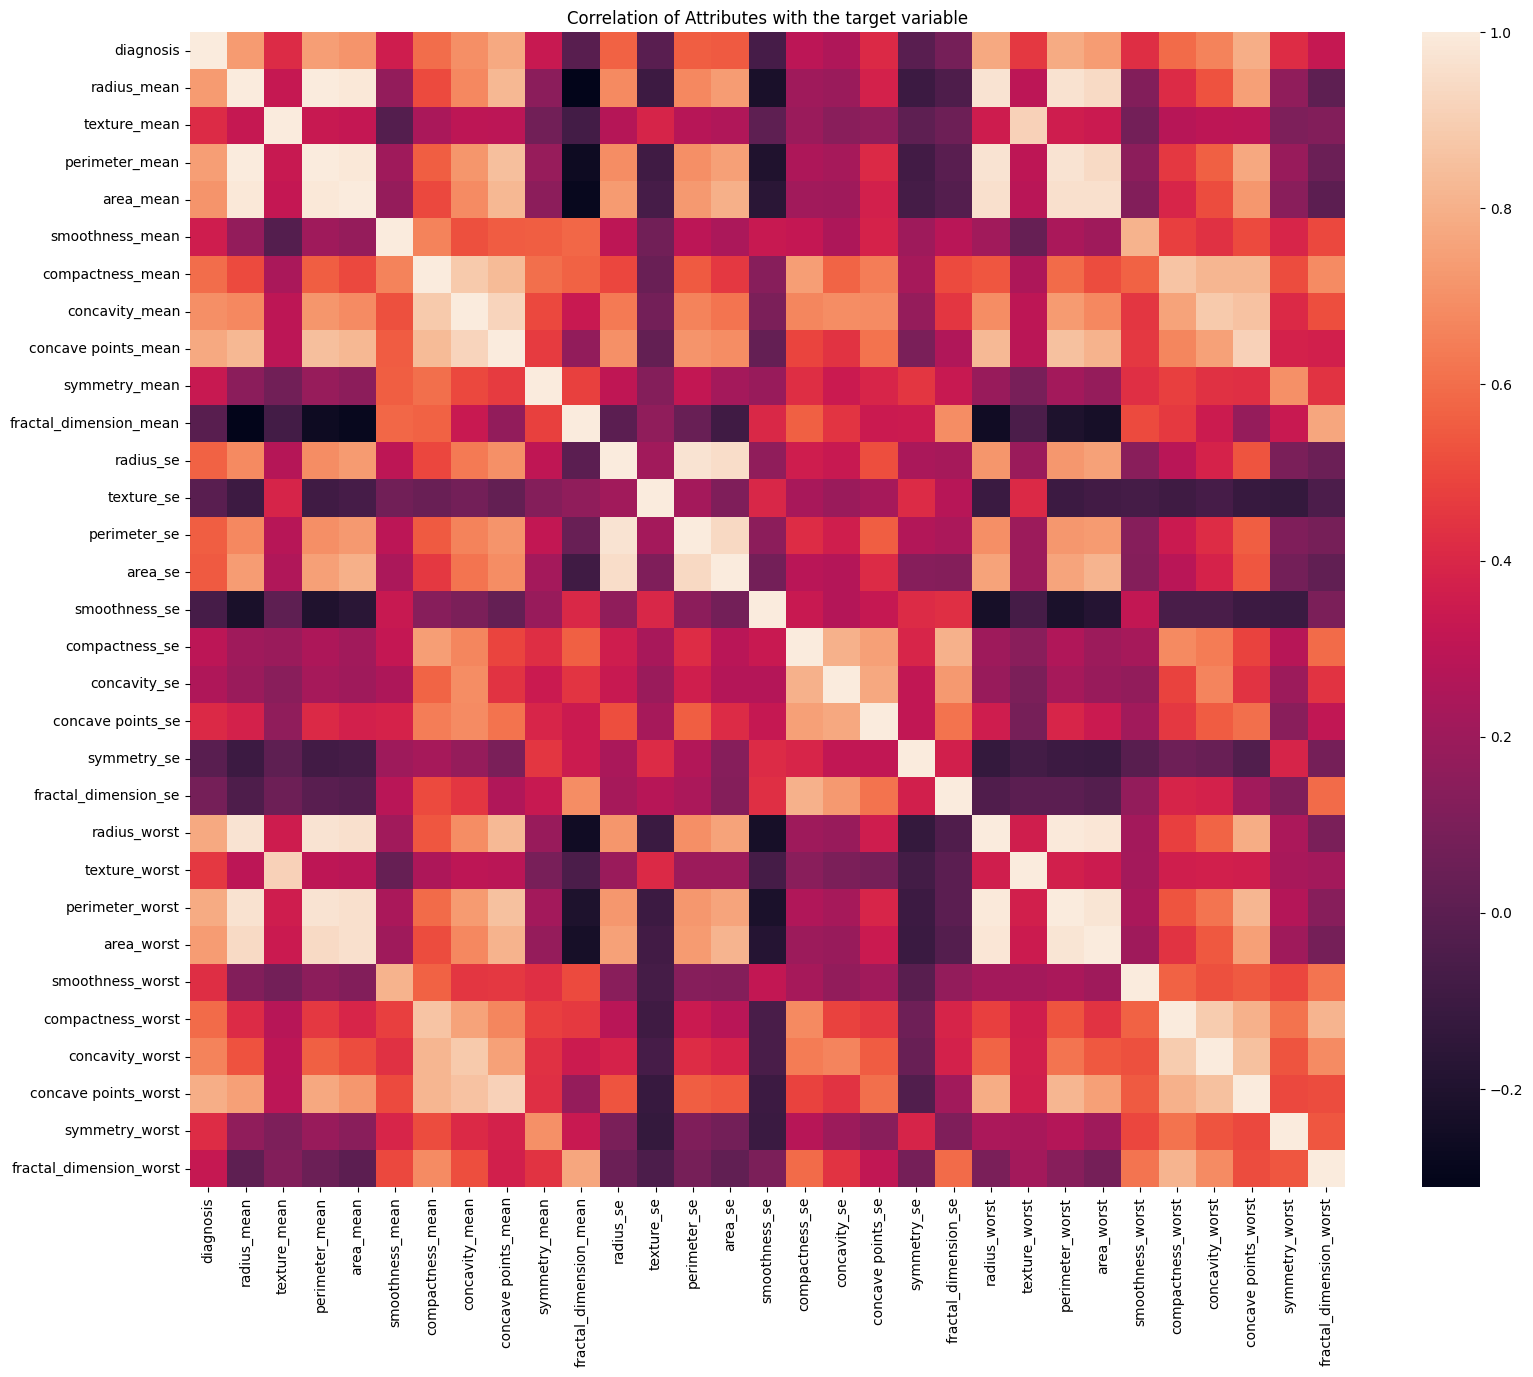

In [128]:
plt.figure(figsize=(20,15))
plt.title("Correlation of Attributes with the target variable")
sns.heatmap(correlation,square=True)

<div style="display:flex; align-items:center; gap:14px; padding:12px 16px; border-radius:10px;
            background:linear-gradient(90deg,#f8fbff,#ffffff); box-shadow:0 4px 12px rgba(20,40,80,0.04);">
  <!-- small chart SVG icon -->
  <svg width="44" height="44" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
    <rect x="3" y="11" width="3" height="8" rx="0.5" fill="#4F46E5"/>
    <rect x="9" y="7" width="3" height="12" rx="0.5" fill="#0EA5A4"/>
    <rect x="15" y="3" width="3" height="16" rx="0.5" fill="#F59E0B"/>
  </svg>

  <div>
    <h2 style="margin:0; font-size:20px; color:#0f172a;">Model Building</h2>
    <p style="margin:6px 0 0; color:#475569; font-size:13px;">
      
  </div>
</div>


In [129]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)




In [130]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
y_pred=knn.predict(X_test_scaled)


# model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



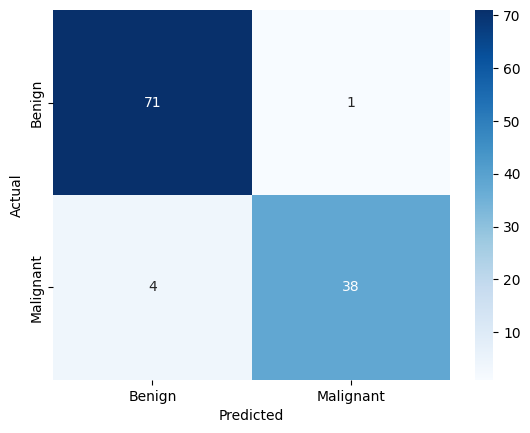

In [131]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.show()


In [132]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), scaler.fit_transform(X), y, cv=cv, scoring='accuracy')
print("CV accuracy (5-fold):", scores, "mean:", np.mean(scores))


CV accuracy (5-fold): [0.98245614 0.95614035 0.94736842 0.98245614 0.96460177] mean: 0.9666045645086166
